In [12]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import plotly
import plotly.express as px

In [13]:
df = pd.read_csv('churn.csv')
df = df.drop(['RowNumber'], axis=1)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## Задание 9.1 

Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

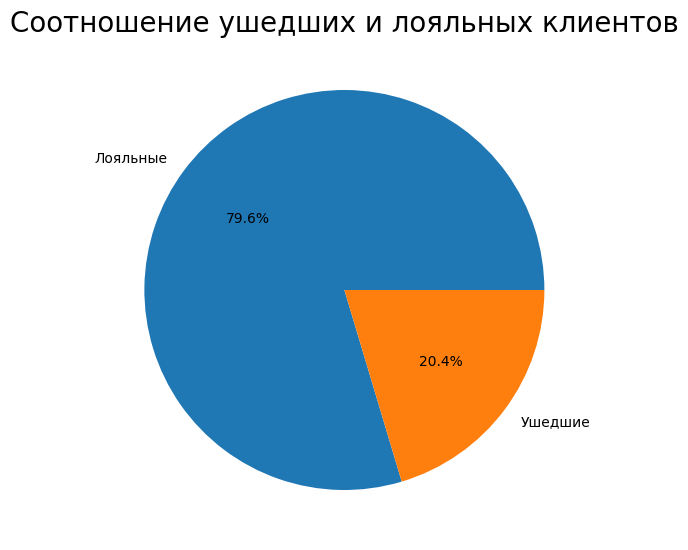

In [69]:
df_loyal = df['Exited'].value_counts()

fig_loyal = plt.figure(figsize=(5, 5))
axes_loyal = fig_loyal.add_axes([0, 0, 1, 1])
axes_loyal.pie(df_loyal,
        labels=['Лояльные', 'Ушедшие'],
        autopct='%.1f%%');

axes_loyal.set_title('Соотношение ушедших и лояльных клиентов', fontsize=20);

Круговая диаграмма показала, что лояльных клиентов примерно в 4 раза больше, чем ушедших.

## Задание 9.2

Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

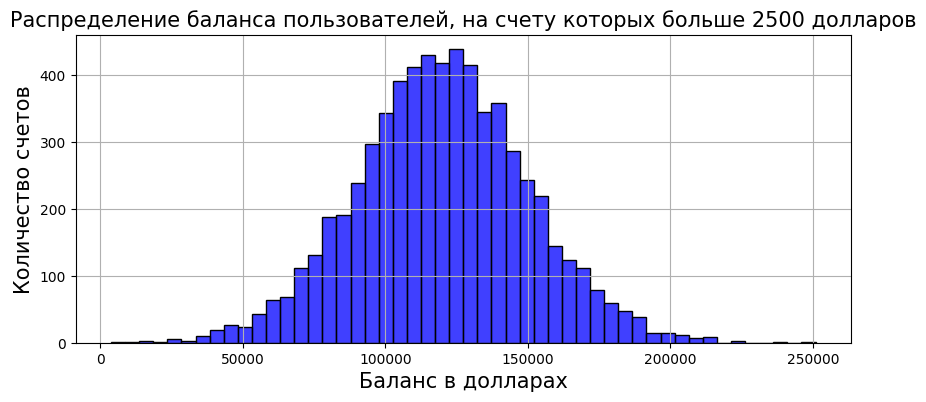

In [42]:
df_balance = df[df['Balance'] > 2500]


fig_balance = plt.figure(figsize=(10, 4))
hist_balance = sns.histplot(
    data=df_balance,
    x='Balance',
    bins=50,
    color='Blue');

hist_balance.set_title('Распределение баланса пользователей, на счету которых больше 2500 долларов', fontsize=15);
hist_balance.set_xlabel('Баланс в долларах', fontsize=15);
hist_balance.set_ylabel('Количество счетов', fontsize=15);
hist_balance.grid()

На гистограмме можем наблюдать нормальное распределение. Большинство клиентов имеет на балансе  от 100000 до 150000 долларов.

## Задание 9.3

Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

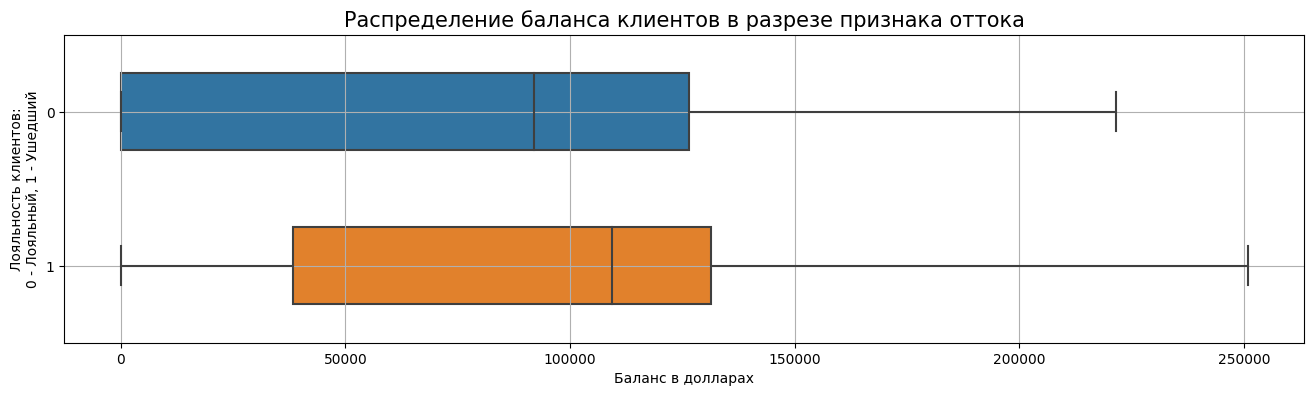

In [108]:
fig_box = plt.figure(figsize=(16, 4))


box_plot = sns.boxplot(
    data=df,
    y='Exited',
    x='Balance',
    orient='h',
    width=0.5
);

box_plot.set_title('Распределение баланса клиентов в разрезе признака оттока', fontsize=15);
box_plot.set_xlabel('Баланс в долларах', fontsize=10);
box_plot.set_ylabel('''Лояльность клиентов:
0 - Лояльный, 1 - Ушедший''', fontsize=10, loc='center');
box_plot.grid()

Распределение счетов ушедших клиентов лежит в более плотном промежутке, чем у лояльных клиентов. Медианное значение ушедших клиентов выше, чем у лояльных клиентов (110000 и 90000 соответственно). Можно сделать вывод, что в среднем ушедшие клиенты состоятельнее лояльных. Возможно, у банка недостаточно выгодные предложения для крупных денежных сумм или же клиенты достигли определенных целей по накоплению (приобретение недвижимости, автомобиля и т.п.).

## Задание 9.4

Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

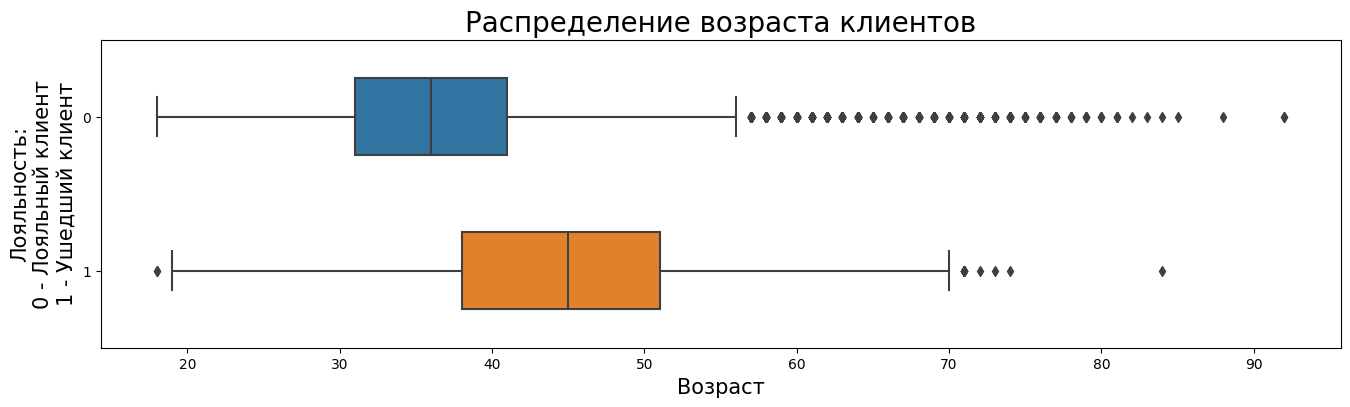

In [100]:
fig = plt.figure(figsize=(16, 4))

axes_box = sns.boxplot(
    data=df,
    x='Age',
    y='Exited',
    orient='h',
    width=0.5
);
axes_box.set_title('Распределение возраста клиентов', fontsize=20);
axes_box.set_xlabel('Возраст', fontsize=15);
axes_box.set_ylabel('''Лояльность:
0 - Лояльный клиент
1 - Ушедший клиент''', fontsize=15);

Потенциальных выбросов больше среди лояльных клиентов. Внимание следует обрать на группу в возрасте от 38 до 52 лет, так как наибольшая часть ушедших клиентов входит в этот диапазон.

## Задание 9.5

Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

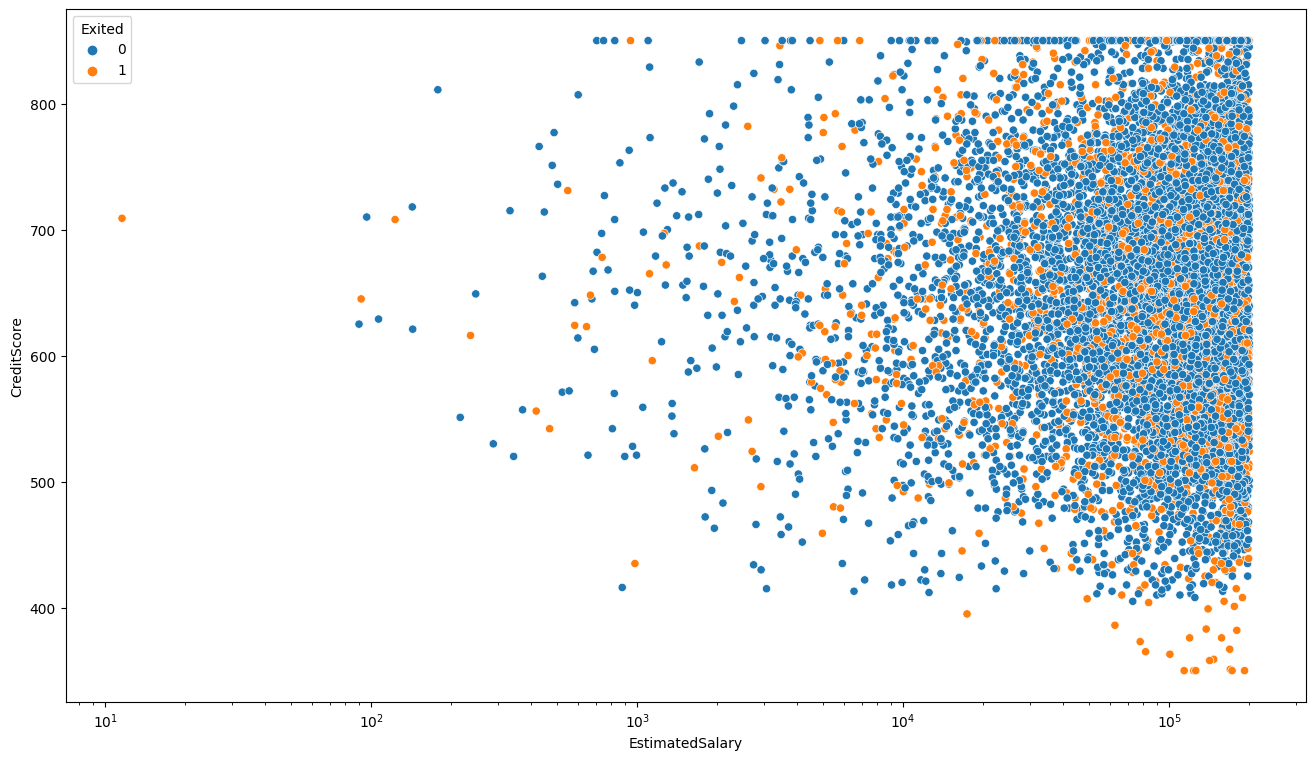

In [153]:
fig = plt.figure(figsize=(16, 9))

axes_scatter = sns.scatterplot(
    data=df,
    x='EstimatedSalary',
    y='CreditScore',
    hue='Exited'
);

axes_scatter.set_xscale('log');

Явной взаимосвязи кредитного рейтинга и предпогалаемой зарплаты в разрезе признака оттока клиентов не наблюдается. По диаграмме видно, что клиенты с высокой заработной платой имеют как и высокй рейтинг, так и низкий. Метки как лояльных, так и ушедших клиентов распределены в одной и той же области графика.

## Задание 9.6

Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

### Вариант 1

Построение круговой диаграммы на основе таблицы, где после фильтрации остаются только ушедшие клиенты.

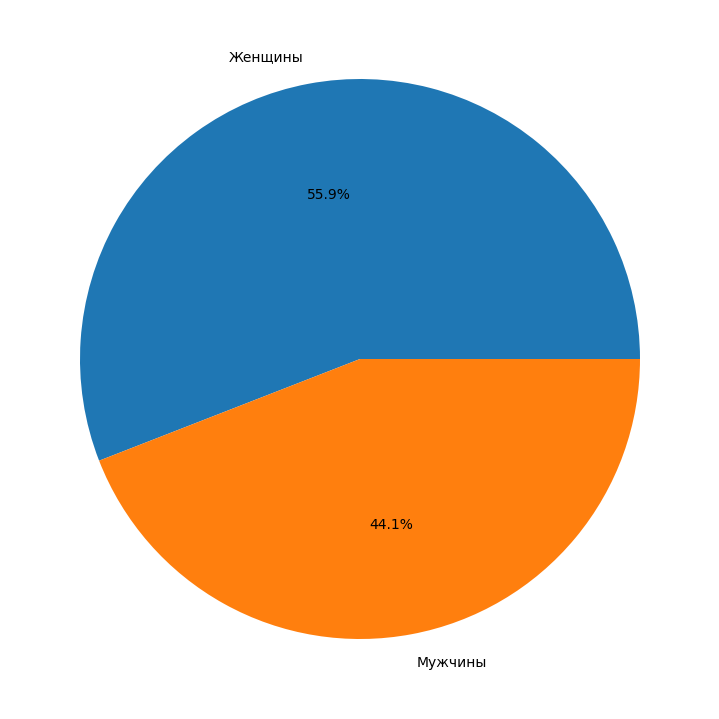

In [154]:
data_out = df[df['Exited'] == 1]['Gender'].value_counts()

fig = plt.figure(figsize=(7, 7))

axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    data_out,
    labels=['Женщины', 'Мужчины'],
    autopct='%.1f%%'
);

Среди всех ушедших клиентов женщин больше чем мужчина на 11,8%.

### Вариант 2

Здесь рассматриваем отношение числа ушедших мужчин и женщин к общему числу клиентов.

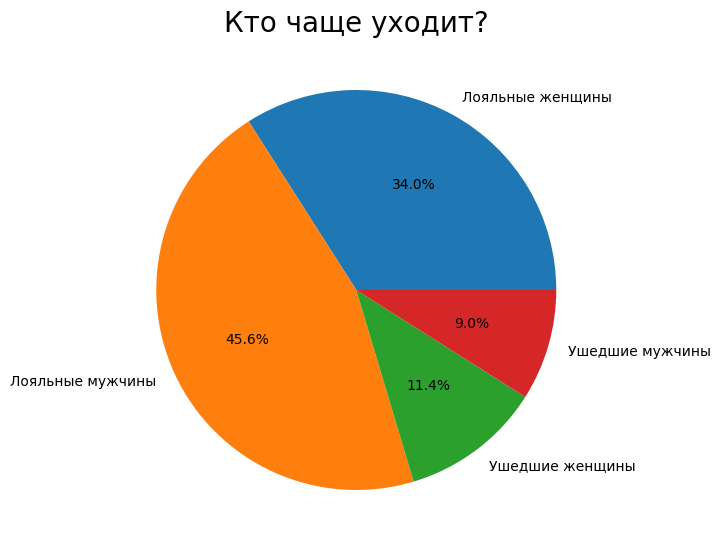

In [181]:
df2 = df.groupby(['Exited', 'Gender'])['Gender'].count()

fig_gend = plt.figure(figsize=(5, 5))
axes_gend = fig_gend.add_axes([0, 0, 1, 1])
axes_gend.pie(
    df2,
    labels = ['Лояльные женщины', 'Лояльные мужчины', 'Ушедшие женщины', 'Ушедшие мужчины'],
    autopct='%.1f%%'
);

axes_gend.set_title('Кто чаще уходит?', fontsize=20);

Круговая диаграмма показала, что среди ушедших клиентов женщин больше чем мужчин на 2,4%

## Задание 9.7

Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

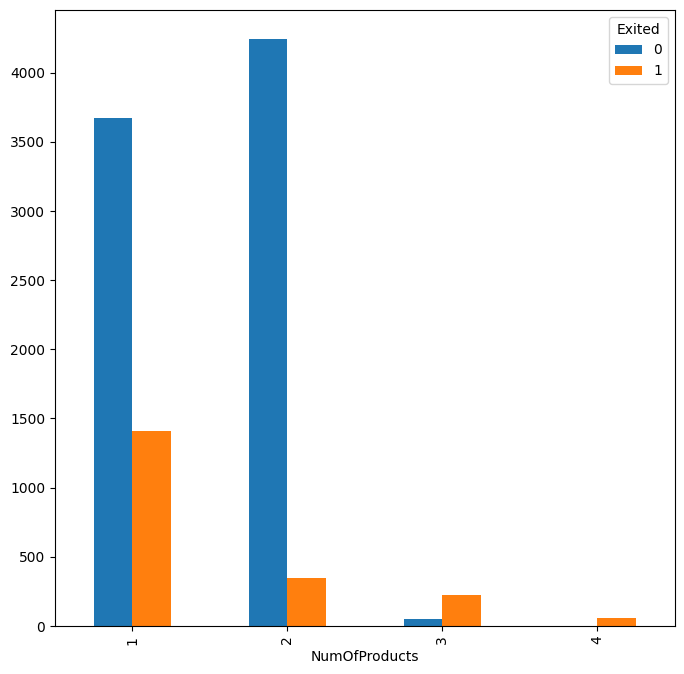

In [187]:
pivot_df = df.pivot_table(
    values = 'CustomerId',
    index = ['NumOfProducts'],
    columns = ['Exited'],
    aggfunc='count',
    fill_value=0
)

fig_pivot, axes_pivot = plt.subplots(figsize=(8, 8))
pivot_df.plot(
    kind='bar',
    ax=axes_pivot
);

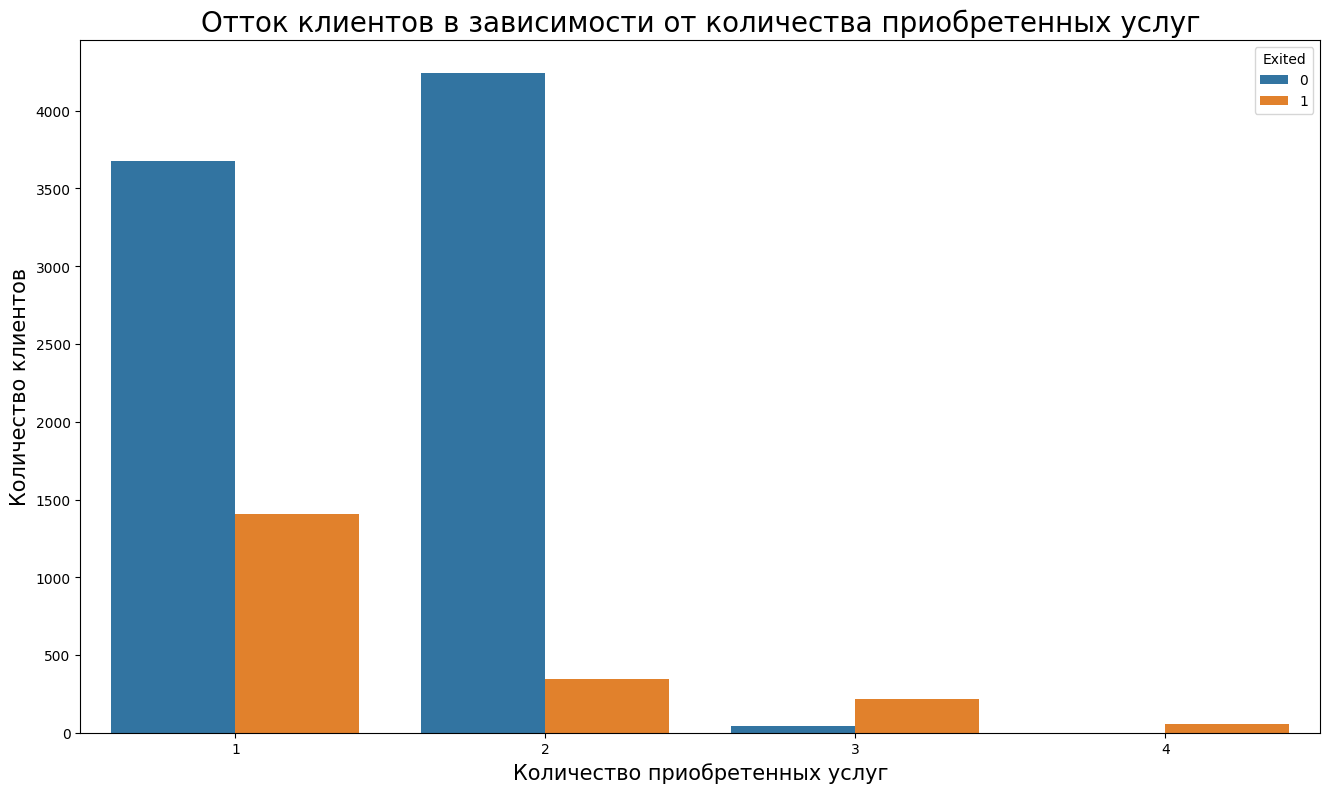

In [188]:
fig = plt.figure(figsize=(16, 9))

# axes_prod = sns.barplot(
#     data=df,
#     x='NumOfProducts',
#     y='CustomerId',
#     hue='Exited',
#     estimator='mean'
# );

# pivot_df.plot(
#     kind='bar',
#     figsize=(16, 9)
# );


axes_prod = sns.countplot(
    data=df,
    x='NumOfProducts',
    hue='Exited'
);


axes_prod.set_title('Отток клиентов в зависимости от количества приобретенных услуг', fontsize=20);
axes_prod.set_xlabel('Количество приобретенных услуг', fontsize=15);
axes_prod.set_ylabel('Количество клиентов', fontsize=15);

Больше всего отток клиентов наблюдается в группе, в которой клиенты имеют одну приобретенную банковскую услугу. 

## Задача 9.8

Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

Exited,0,1
IsActiveMember,,
0,3547,1302
1,4416,735


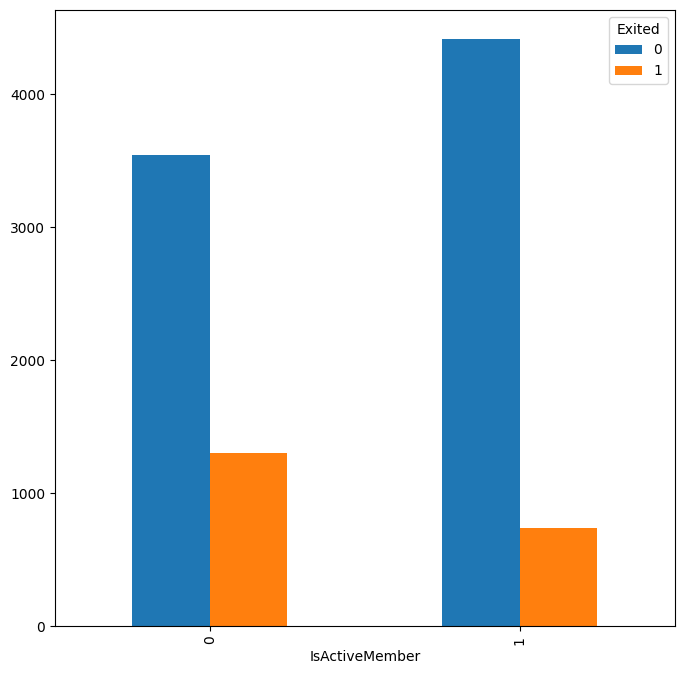

In [191]:
pivot_8 = df.pivot_table(
    values = 'CustomerId',
    index = 'IsActiveMember',
    columns = 'Exited',
    aggfunc = 'count',
    fill_value = 0
)

display(pivot_8)

fig_8, axes_8 = plt.subplots(figsize=(8, 8))
pivot_8.plot(
    kind='bar',
    ax=axes_8
);

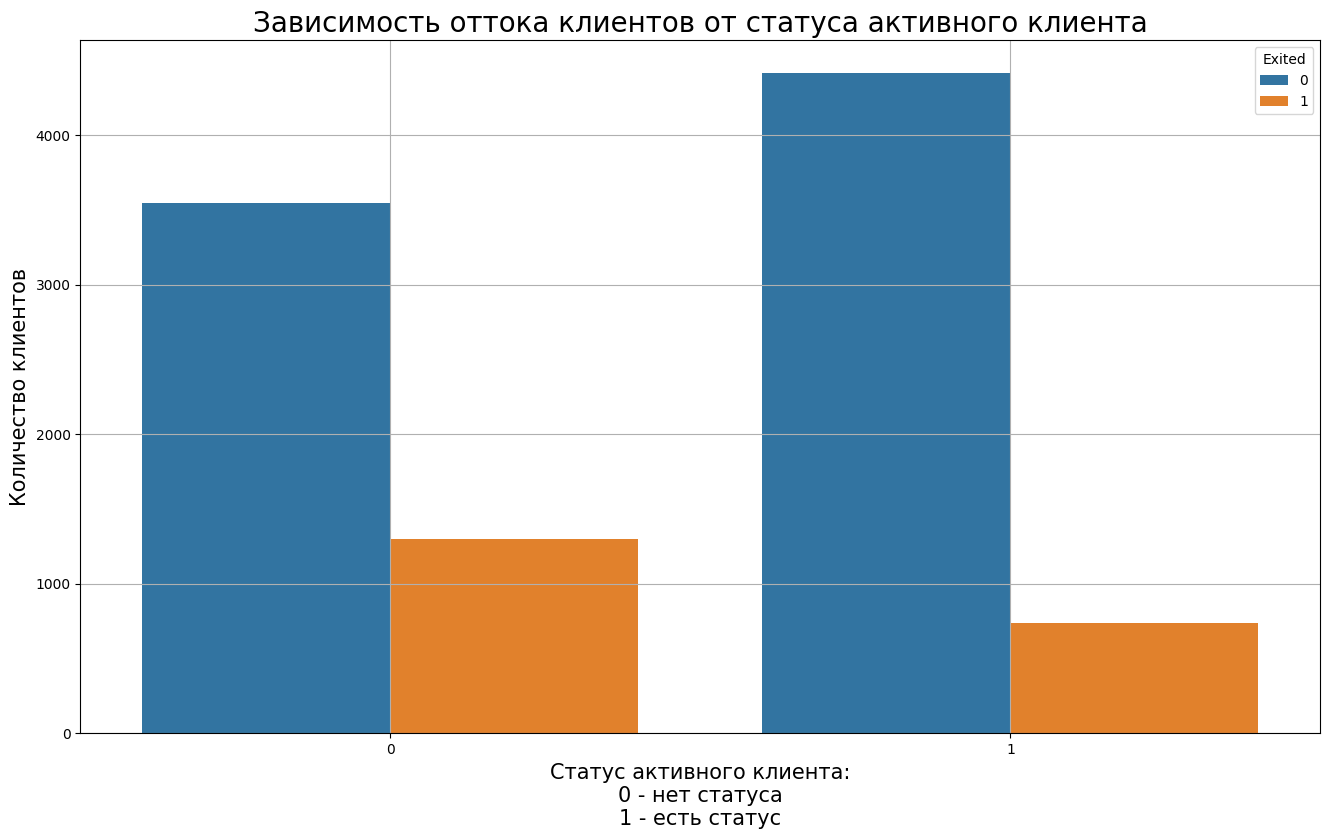

In [29]:
fig = plt.figure(figsize=(16, 9))

active = sns.countplot(
    data=df,
    x='IsActiveMember',
    hue='Exited'
);

active.set_title('Зависимость оттока клиентов от статуса активного клиента', fontsize=20);
active.set_xlabel('''Статус активного клиента:
0 - нет статуса
1 - есть статус''', fontsize=15);
active.set_ylabel('Количество клиентов', fontsize=15);
active.grid();

Многоуровневая диаграмма показывает, что клиенты, имеющие статус активного клиента, уходя реже (1250 - нет статуса, 800 - есть статус). Во всяком случае - различия небольшие. Можно сказать, что статус активного клиента не сильно влияет на отток.

Чтобы уменьшить отток среди неактивных клиентов, банк может попробовать стимулировать клиентов вести более активную финансовую деятельность: различные подписки, бонусы за оплату картой банка в магазине, партнерство с медиасервисами/маркетплейсами.

## Задание 9.9

В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [125]:
df2 = df.groupby(['Geography'], as_index=False)['Exited'].mean()

fig = px.choropleth(
    data_frame = df2,
    locations= 'Geography',
    locationmode = 'country names',
    color='Exited',
    color_continuous_scale = 'Reds',
    width=800,
    height=600,
    title='Отток клиентов по странам'
)
fig.show()

Доля ушедших клиентов больше всего в Германии. Это может быть связано с тем, что немцы финансово грамотнее остальных европейцев, принимают активное участие в своей экономической жизни. То есть если где-то более выгодное для них предложение, то они незамедлительно действуют. Также у немцев счет в среднем в 2 раза больше, а как мы уже видели ранее в п.9.3, клиенты с большими счетами склонны уходить чаще. Возможно, что для крупных сумм условия хранения у данного банка не очень выгодные.

## Задание 9.10

Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

In [32]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

In [33]:
df1 = df.copy()

In [34]:
df1['CreditScoreCat'] = df1['CreditScore'].apply(get_credit_score_cat)

In [35]:
pivot2 = df1.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure',
    aggfunc='mean',
    fill_value=0
)
pivot2.columns = pivot2.columns.astype('string')

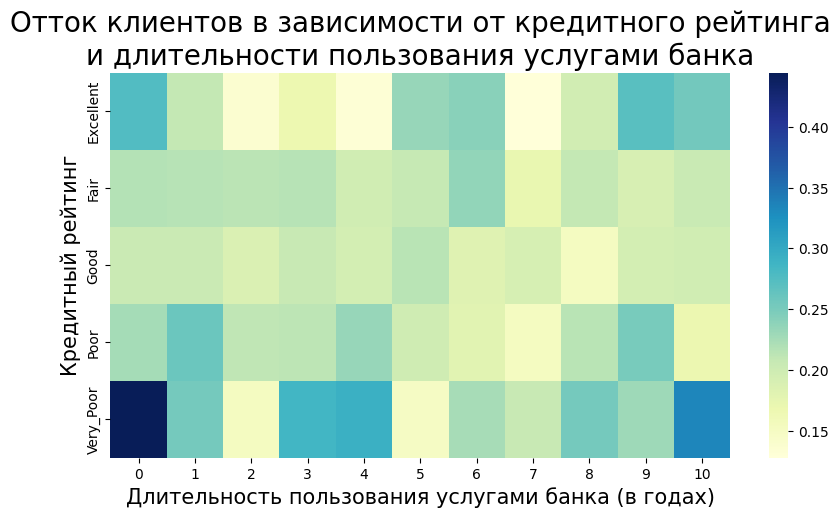

In [36]:
fig = plt.figure(figsize=(10, 5))

heatmap = sns.heatmap(
    data=pivot2,
    cmap='YlGnBu'
);

heatmap.set_title('''Отток клиентов в зависимости от кредитного рейтинга
и длительности пользования услугами банка''', fontsize=20);
heatmap.set_xlabel('Длительность пользования услугами банка (в годах)', fontsize=15);
heatmap.set_ylabel('Кредитный рейтинг', fontsize=15);

Больше всего отток наблюдается в группе клиентов с очень низким кредитным рейтингом и длительностью пользования услугами до 1 года. Доля ушедших в ней составляет около 40%. В целом, клиенты с низким кредитным рейтингом, не зависимо от длительности пользования услугами банка, уходят чаще остальным. Возможно это связано с тем, что банк не хочет рисковать и связываться с потенциальными ненадежными клиентами, поэтому не предлагает таким клиентам интересные и выгодные предложения, из-за чего клиенты уходят.

Одновременно с этим можем наблюдать уход клиентов с превосходным кредитным рейтингом. Больше всего наблюдается в группе, где длительность пользования услугами банка составляет до 1 года или 9-10 лет. Отток в первой группе возможен по причине потери инетереса клиента к услугам банка на фоне других более выгодных предложений. Это могут быть молодые люди, которым свойственна самоуверенность и переменчивость: недостаточно хорошо проанализировали предложения на рынке банковских услуг, "купились" на первое попавшееся и уже после наткнулись на более выгодное. Отток в группе с длительностью пользования услугами банка 9-10 лет может быть связан с тем, что у клиентов закрываются долгосрочные вклады, но пролонгация на предлагаемых условиях им не нравится, из-за чего эти клиенты уходят к банкам с более выгодными предложениями. 